In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder   # better to use dummy from pandas
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")
y = df.total_claim_amount   # extract target variable y from dataframe
# drop target variable (total_claim_amount) and effective_to_date for encoding
df = df.drop(["effective_to_date","total_claim_amount"],axis=1) 
df

,region,customer_lifetime_value,response,coverage,education,month,employment_status,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,4809,no,basic,college,feb,employed,m,48029,suburban,...,7,52,0,9,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,2228,no,basic,college,jan,unemployed,f,92260,suburban,...,3,26,0,1,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,14947,no,basic,bachelor,feb,employed,m,22139,suburban,...,34,31,0,2,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,22332,yes,extended,college,jan,employed,m,49078,suburban,...,10,3,0,2,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,9025,no,premium,bachelor,jan,medical leave,f,23675,suburban,...,33,31,0,7,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,jan,unemployed,f,61541,suburban,...,12,40,0,7,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,5259,no,basic,college,jan,employed,f,61146,urban,...,7,68,0,6,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,23893,no,extended,bachelor,feb,employed,f,39837,rural,...,11,63,0,2,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,11971,no,premium,college,feb,employed,f,64195,urban,...,0,27,4,6,personal auto,personal l1,offer1,branch,suv,medsize


In [4]:
cats = df.select_dtypes(include="object")   # categorical data
nums = df.select_dtypes(include="number")   # numerical data
X = nums

### Check for multicollinearity and drop highly correlated features

#### Heatmap

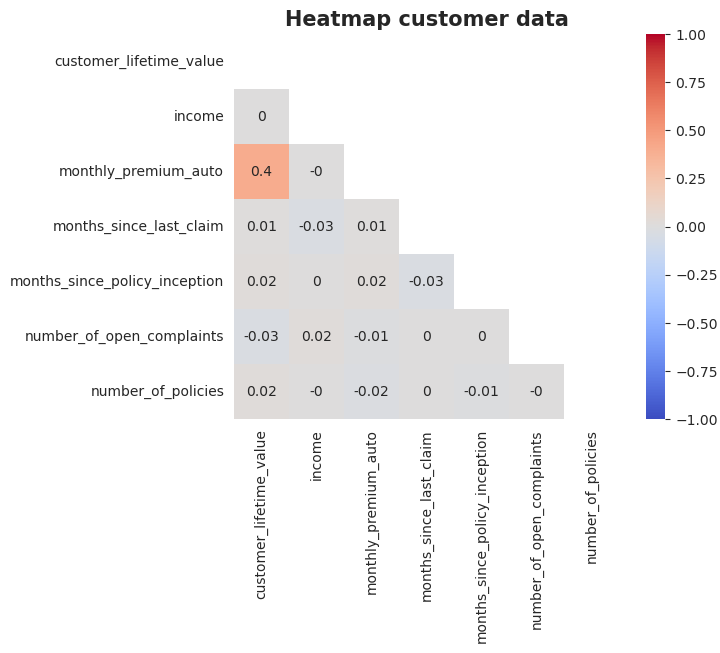

In [8]:
corr = nums.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(round(corr,2), mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)
    ax.set_title("Heatmap customer data", weight="bold", size=15)

----> No highly correlated (>0.8) features, no need to drop columns

### One-hot encoding

In [101]:
cats_hotcoded = pd.get_dummies(cats, drop_first=True)
cats_hotcoded

# alternative:
#enc = OneHotEncoder()

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


### Train/test split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)

### Histograms

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

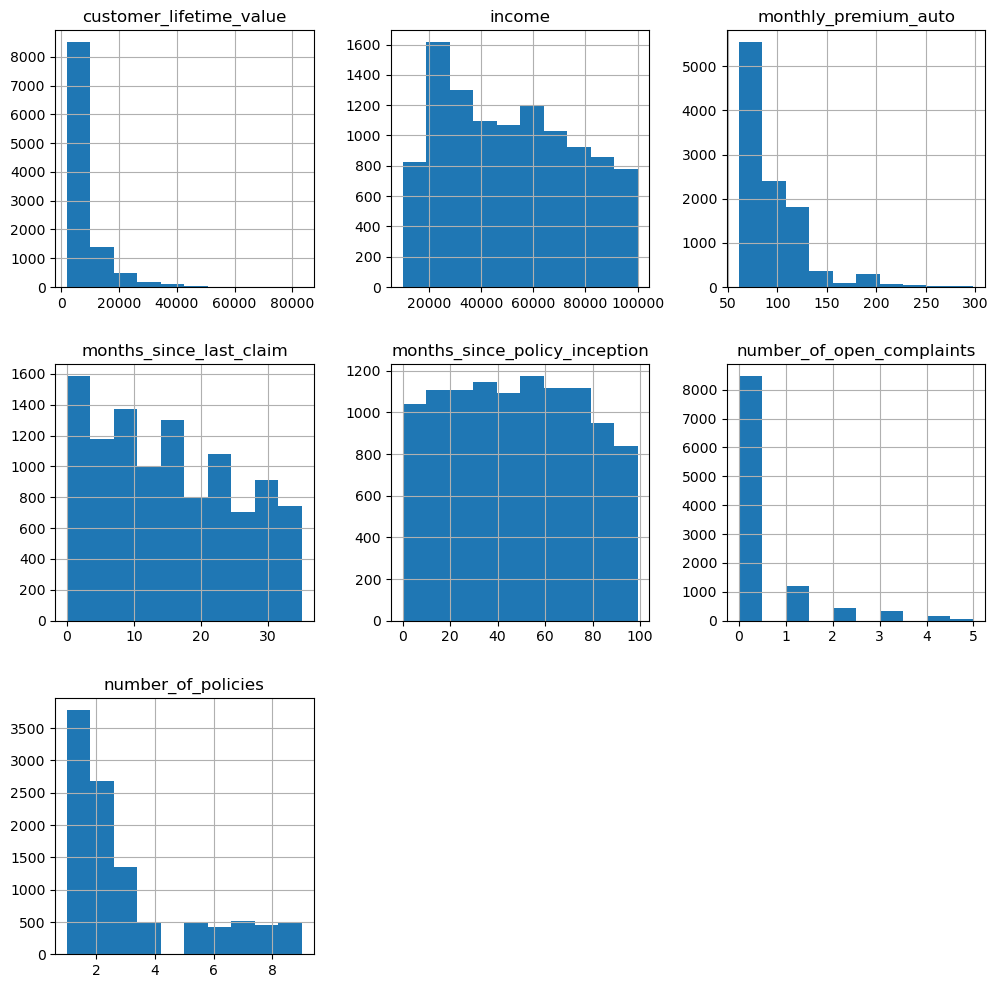

In [103]:
X.hist(figsize=(12,12))

### Standardize

In [104]:
std_scaler = StandardScaler().fit(X_train)    # finding the parameters (mean, variance from the training set)
X_train_scaled = std_scaler.transform(X_train)
X_train.shape

(7482, 7)

In [132]:
X_test_scaled = std_scaler.transform(X_test)
X_test.shape

(3207, 7)

In [133]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ...  1.36516733 -0.42500069
  -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 ...  1.68786198 -0.42500069
   0.84759702]
 [-0.5223013   0.26592193  0.48489091 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115 ... -1.61079442 -0.42500069
  -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.40967729 -0.7597249   0.57248529 ... -0.79857077 -0.42547654
  -0.49881985]
 [ 1.58428551 -0.93947257 -1.23371005 ... -1.05867274 -0.97370317
  -0.95695203]
 [-0.61362178 -0.64253    -0.90270406 ... -0.58471355 -0.81597938
   0.71615674]
 ...
 [ 1.54444214  0.755633    0.39708339 ... -1.18053489 -1.61079442
  -1.00126009]
 [-0.42500069  0.67949919 -0.42500069 ... -0.42500069  0.67949919
  -0.42500069]
 [ 2.51614162 -0.82094758 -0.40381143 ... -0.82094758  0.43046087
  -0.82094758]]


In [137]:
type(X_test_scaled)

numpy.ndarray

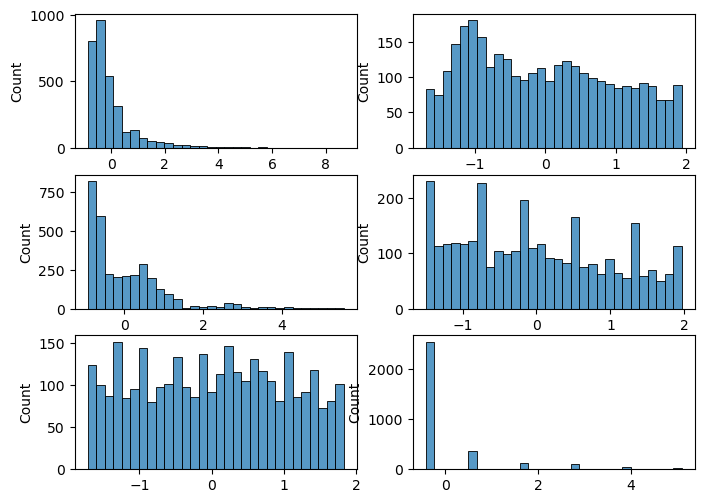

In [138]:
plt.subplots(figsize=(8,8))
for i in range(0,6):
    plt.subplot(4,2,i+1)
    sns.histplot(X_test_scaled[i,:],bins=30)
plt.show()

### Apply Linear Regression

In [108]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant
pd.DataFrame(X_train_const_scaled)

,0,1,2,3,4,5,6,7
0,1.0,-0.110216,-1.272917,-0.671438,0.779993,1.365167,-0.425001,-0.403811
1,1.0,-0.427941,0.747295,-0.729255,-0.902881,1.687862,-0.425001,0.847597
2,1.0,-0.522301,0.265922,0.484891,-0.902881,0.504648,-0.425001,-0.820948
3,1.0,2.072834,-0.118424,0.109084,-0.506910,-1.610794,-0.425001,-0.403811
4,1.0,-0.811906,-1.044835,-0.671438,1.373949,-0.642710,-0.425001,-0.820948
...,...,...,...,...,...,...,...,...
7477,1.0,-0.716821,0.887454,-0.497989,1.868912,0.002679,-0.425001,-0.820948
7478,1.0,-0.344016,1.085555,-0.613622,-0.110940,-1.001260,1.783999,2.099005
7479,1.0,-0.811326,-1.172249,-0.902704,-1.001873,-1.395665,-0.425001,-0.820948
7480,1.0,2.255758,0.985371,-0.787071,0.977978,-1.610794,-0.425001,-0.403811


In [109]:
model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 
X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     742.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:03:41   Log-Likelihood:                -51168.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7474   BIC:                         1.024e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.770      0.0

In [110]:
predictions_test

array([260.52304948, 353.76752657, 297.68091412, ..., 367.57334203,
       317.67903438, 608.06079373])

### Modeling using Scikit Learn

#### Model fitting

In [111]:
model = LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

#### Model parameters

In [112]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6608,7271,20545,70,23,86,0,2
5697,5079,70474,68,6,95,0,5
10524,4428,58577,110,6,62,0,1
397,22332,49078,97,10,3,0,2
6324,2430,26182,70,29,30,0,1
...,...,...,...,...,...,...,...
9785,3086,73938,76,34,48,0,1
7763,5658,78834,72,14,20,2,8
5218,2434,23033,62,5,9,0,1
1346,23594,76358,66,25,3,0,2


In [113]:
model.coef_

array([ -6.5986299 , -33.18126217, 187.80190938,   1.90598135,
        -0.91148552,   1.71705592,  -2.32015745])

In [114]:
model.intercept_

433.0597433841219

#### Making predictions

In [115]:
y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)   # model prediction

### Evaluating Model Performance

In [116]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

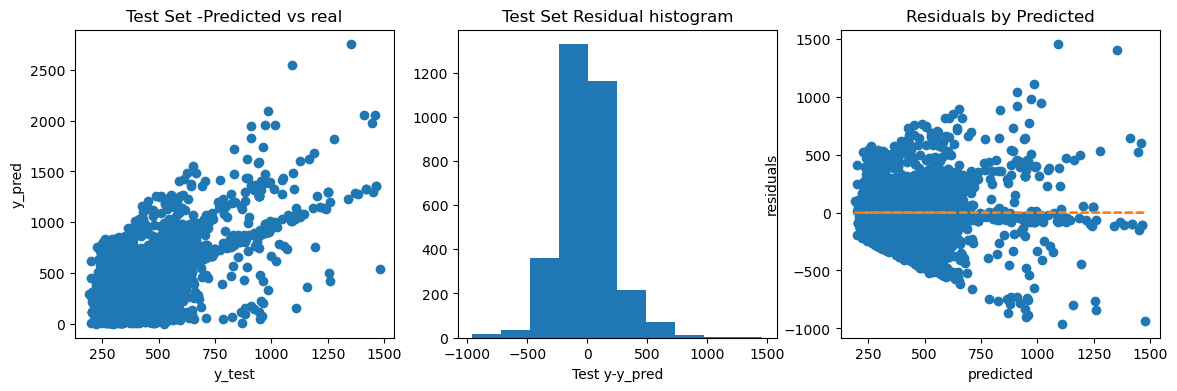

In [117]:
# Make a scatter plot y_pred vs y
# What kind of plot you will get if all the predictions are perfect? A straight line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### more fancy using seaborn

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

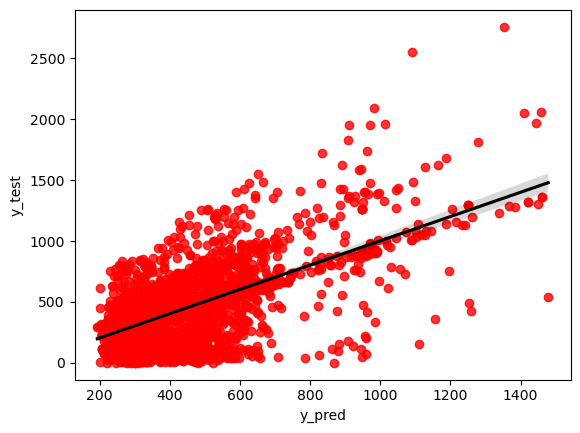

In [118]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

#### Error metrics

In [119]:
MSE_test = mse(y_test,y_pred)
MAE_test = mae(y_test,y_pred)
RMSE_test = math.sqrt(MSE_test)
print("(Test) Root Mean Square Error:",round(RMSE_test,2),"\n")
print("(Test) Mean Absolute Error:",round(MAE_test,2),"\n")
print("(Test) Mean Square Error:     ",round(MSE_test,2))

(Test) Root Mean Square Error: 222.34 

(Test) Mean Absolute Error: 152.03 

(Test) Mean Square Error:      49433.0


In [120]:
MSE_train = mse(y_train,y_pred_train) 
RMSE_train = math.sqrt(MSE_train)
print("(Training) Root Mean Square Error:",round(RMSE_train,2),"\n")
print("(Training) Mean Square Error:     ",round(MSE_train,2))

(Training) Root Mean Square Error: 225.85 

(Training) Mean Square Error:      51007.94


In [121]:
r2=round(r2_score(y_test,y_pred),2)
r2

0.41

In [122]:
r2_adj = round(1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),2)
r2_adj

0.41

### Feature analysis

In [123]:
X_test.shape[1]     # getting the number of parameters

7

#### Feature importance

In [124]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.801909
1,income,33.181262
0,customer_lifetime_value,6.598630
6,number_of_policies,2.320157
3,months_since_last_claim,1.905981
5,number_of_open_complaints,1.717056
4,months_since_policy_inception,0.911486


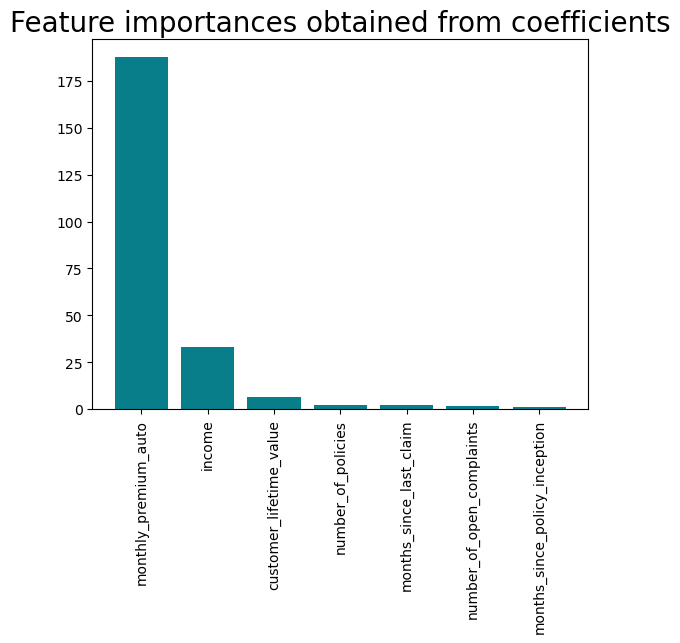

In [125]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Save to csv file

In [126]:
df.to_csv("Data/Customer_Analysis_Case_Study_transformed_data.csv")

### Label encoding

In [85]:
# this part still needs to be finalized

In [76]:
df.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'month', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

In [56]:
df.months_since_last_claim.unique()

array([ 7,  3, 34, 10, 33,  2,  8, 35, 19, 13,  5, 24, 25,  6, 20, 26, 14,
        9, 29, 11,  1, 18, 16, 30, 12,  4, 22, 31, 21, 28, 17, 15, 32, 23,
       27,  0])

In [ ]:
label_encode_list = ["region", "response", "coverage", "education", "month", "employment_status", "gender",
                     "location_code", "marital_status",  "policy_type", "renew_offer_type", "sales_channel", "vehicle_class", 
                     "vehicle_size", 

In [ ]:
def label_encoding(x):
    df[x] = le.fit_transform(df[x])
    return df

for i in list_label_categoricals:
    label_encoding(i)
    
categorical[label_encode_list] = categorical[label_encode_list].apply(le.fit_transform)

In [ ]:
reshape
scaler = MinMaxScaler()
months_scaled = scaler.fit_transform()